## OneMax problem with 1000 bits

In [1]:
from thefittest.optimizers import GeneticAlgorithm
from thefittest.benchmarks import OneMax

number_of_iterations = 100
population_size = 200
string_length = 1000

optimizer = GeneticAlgorithm(fitness_function=OneMax(),
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=string_length,
                         show_progress_each=10)

optimizer.fit()

fittest = optimizer.get_fittest()

0 iteration with fitness = 539.0
10 iteration with fitness = 675.0
20 iteration with fitness = 780.0
30 iteration with fitness = 860.0
40 iteration with fitness = 915.0
50 iteration with fitness = 942.0
60 iteration with fitness = 955.0
70 iteration with fitness = 966.0
80 iteration with fitness = 976.0
90 iteration with fitness = 981.0


## Rastrign problem with 10 variables

In [2]:
import numpy as np
from thefittest.tools.transformations import GrayCode
from thefittest.benchmarks import Rastrigin


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=Rastrigin(),
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=30,
                         minimization=True,
                         selection="tournament_k",
                         crossover="two_point",
                         mutation="weak",
                         tour_size=6,
                         optimal_value=0.)

optimizer.fit()

fittest = optimizer.get_fittest()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

0 iteration with fitness = 77.93512633511241
30 iteration with fitness = 3.3011507863294334
60 iteration with fitness = 2.9893371360374807
90 iteration with fitness = 2.984931432879268
120 iteration with fitness = 2.98487882840519
150 iteration with fitness = 2.98487719800306
180 iteration with fitness = 2.98487717132881
210 iteration with fitness = 2.984877171280429
240 iteration with fitness = 2.9848771712798783
270 iteration with fitness = 2.9848771712798747
The fittest individ: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Custom problem

0 iteration with fitness = 164.2743178757397
10 iteration with fitness = 0.006414009985559977
20 iteration with fitness = 6.325589178790705e-07
30 iteration with fitness = 7.258895212886897e-10
The fittest individ: [1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0]
The fittest individ: [ 5.00000331 11.99999599]
with fitness -2.7081647742486364e-11


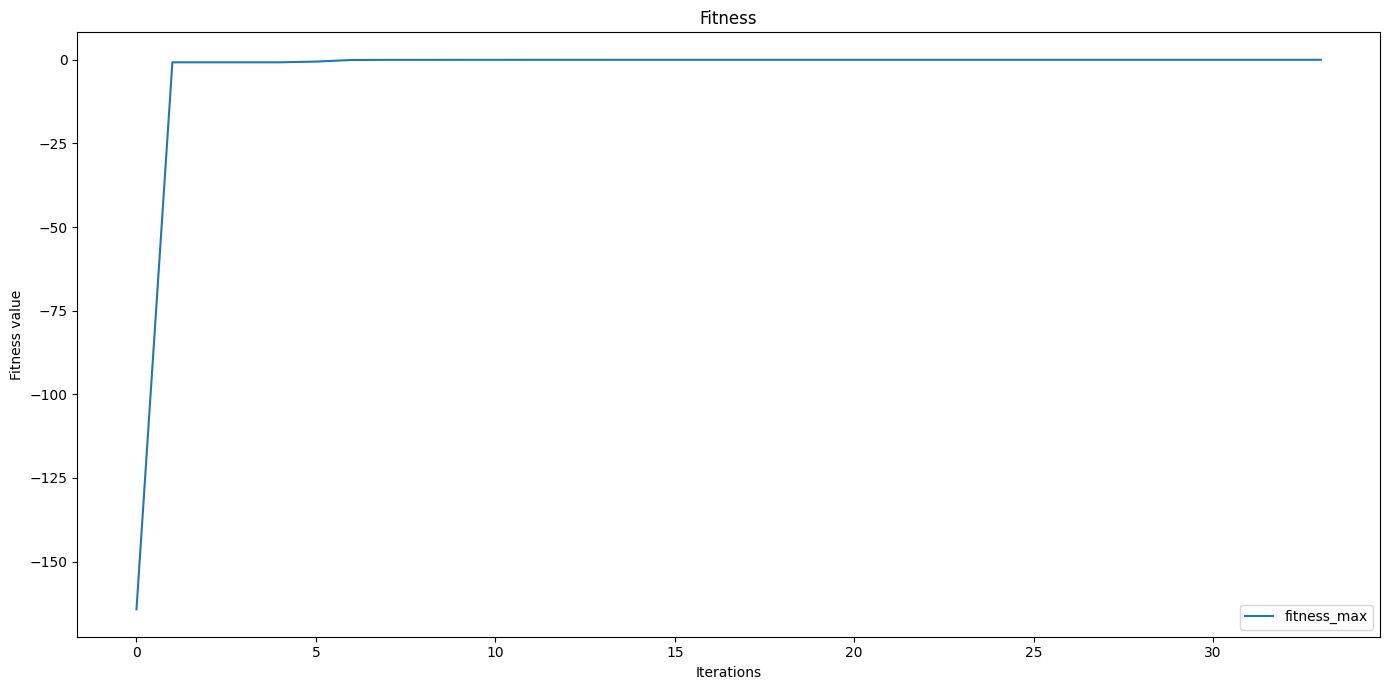

In [3]:
import matplotlib.pyplot as plt


def custom_problem(x):
    return (5 - x[:, 0])**2 + (12 - x[:, 1])**2


n_dimension = 2
left_border = -100.
right_border = 100.
n_bits_per_variable = 32

number_of_iterations = 100
population_size = 100

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)


genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = GeneticAlgorithm(fitness_function=custom_problem,
                         genotype_to_phenotype=genotype_to_phenotype.transform,
                         iters=number_of_iterations,
                         pop_size=population_size,
                         str_len=sum(parts),
                         show_progress_each=10,
                         minimization=True,
                         optimal_value=0,
                         termination_error_value=1e-10,
                         keep_history=True,
                         elitism=False)


optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])


iters_done = len(stats['fitness_max'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=1)
ax.plot(range(iters_done), stats['fitness_max'], label = "fitness_max")
ax.set_title('Fitness')
ax.set_ylabel('Fitness value')
ax.set_xlabel("Iterations")
ax.legend()

plt.tight_layout()
plt.show()

## SelfCGA

0 iteration with fitness = 27.181802712215926
30 iteration with fitness = 0.006293395546191283
60 iteration with fitness = 7.83561218769122e-05
90 iteration with fitness = 3.777480546516208e-07
120 iteration with fitness = 1.8796346662893215e-08
150 iteration with fitness = 1.0876787566818965e-09
180 iteration with fitness = 7.287749508953317e-12
210 iteration with fitness = 1.4457212553845022e-12
240 iteration with fitness = 7.060866648311848e-15
270 iteration with fitness = 7.399679827213568e-16
The fittest individ: [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0

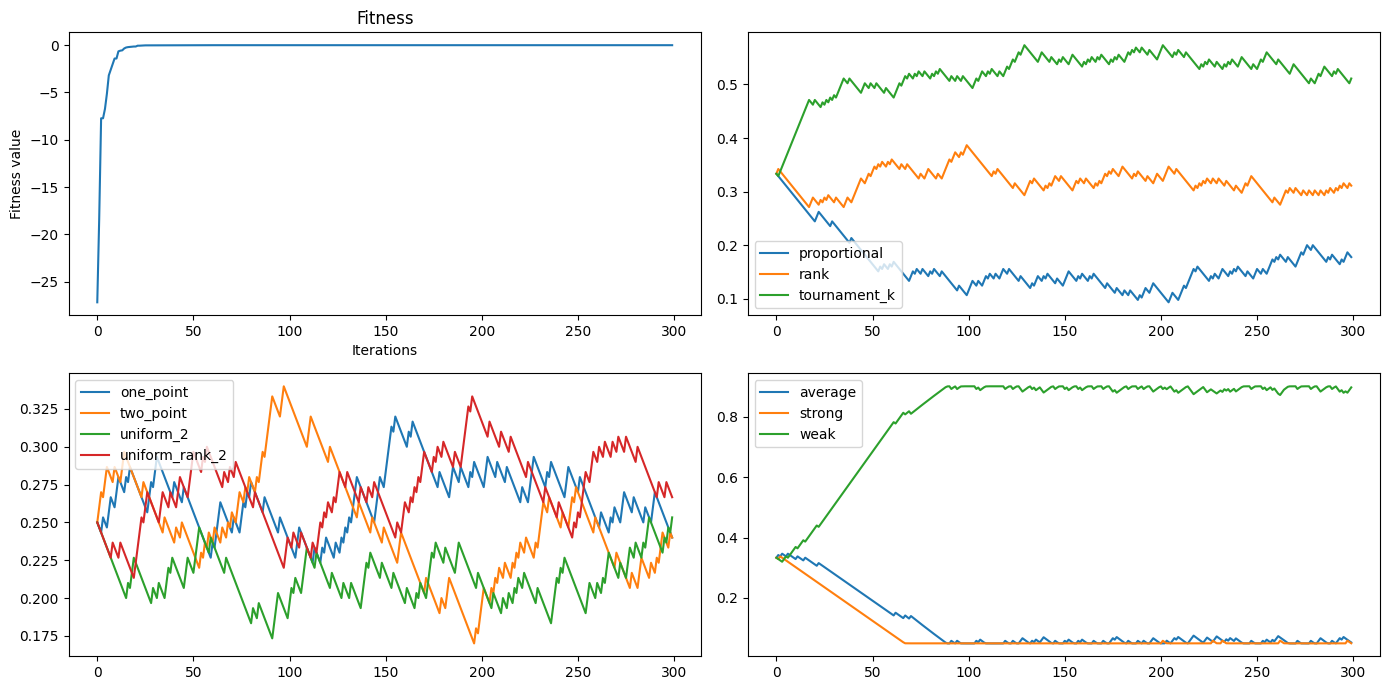

In [4]:
from collections import defaultdict
from thefittest.optimizers import SelfCGA
from thefittest.benchmarks import Sphere


n_dimension = 10
left_border = -5.
right_border = 5.
n_bits_per_variable = 32

number_of_iterations = 300
population_size = 500

left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)
parts = np.full(
    shape=n_dimension, fill_value=n_bits_per_variable, dtype=np.int64)

genotype_to_phenotype = GrayCode(fit_by='parts').fit(left=left_border_array,
                                                     right=right_border_array,
                                                     arg=parts)
optimizer = SelfCGA(fitness_function=Sphere(),
                    genotype_to_phenotype=genotype_to_phenotype.transform,
                    iters=number_of_iterations,
                    pop_size=population_size,
                    str_len=sum(parts),
                    show_progress_each=30,
                    minimization=True,
                    selections=("tournament_k", "rank", "proportional"),
                    crossovers=("two_point", "one_point", "uniform_2", "uniform_rank_2"),
                    mutations=("weak", "average", "strong"),
                    tour_size=5,
                    K=4,
                    keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=2)

ax[0][0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0][0].set_title('Fitness')
ax[0][0].set_ylabel('Fitness value')
ax[0][0].set_xlabel("Iterations")

selectiom_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['s_proba'][i].items():
        selectiom_proba[key].append(value)
    
for key, value in selectiom_proba.items():
    ax[0][1].plot(range(number_of_iterations), value, label = key)
ax[0][1].legend()

crossover_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['c_proba'][i].items():
        crossover_proba[key].append(value)
    
for key, value in crossover_proba.items():
    ax[1][0].plot(range(number_of_iterations), value, label = key)
ax[1][0].legend()

mutation_proba = defaultdict(list)
for i in range(number_of_iterations):
    for key, value in stats['m_proba'][i].items():
        mutation_proba[key].append(value)
    
for key, value in mutation_proba.items():
    ax[1][1].plot(range(number_of_iterations), value, label = key)
ax[1][1].legend()

plt.tight_layout()
plt.show()


## SHAGA

0 iteration with fitness = 9569.23510548113
30 iteration with fitness = 43.593515693058684
60 iteration with fitness = 6.6245971445763825
90 iteration with fitness = 3.7598578560778577
120 iteration with fitness = 3.318197050861654
150 iteration with fitness = 3.258759409249491
180 iteration with fitness = 3.226385355964444
210 iteration with fitness = 3.1972748874840384
240 iteration with fitness = 3.1631194711735597
270 iteration with fitness = 3.12314158897337
The fittest individ: [1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0
 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 

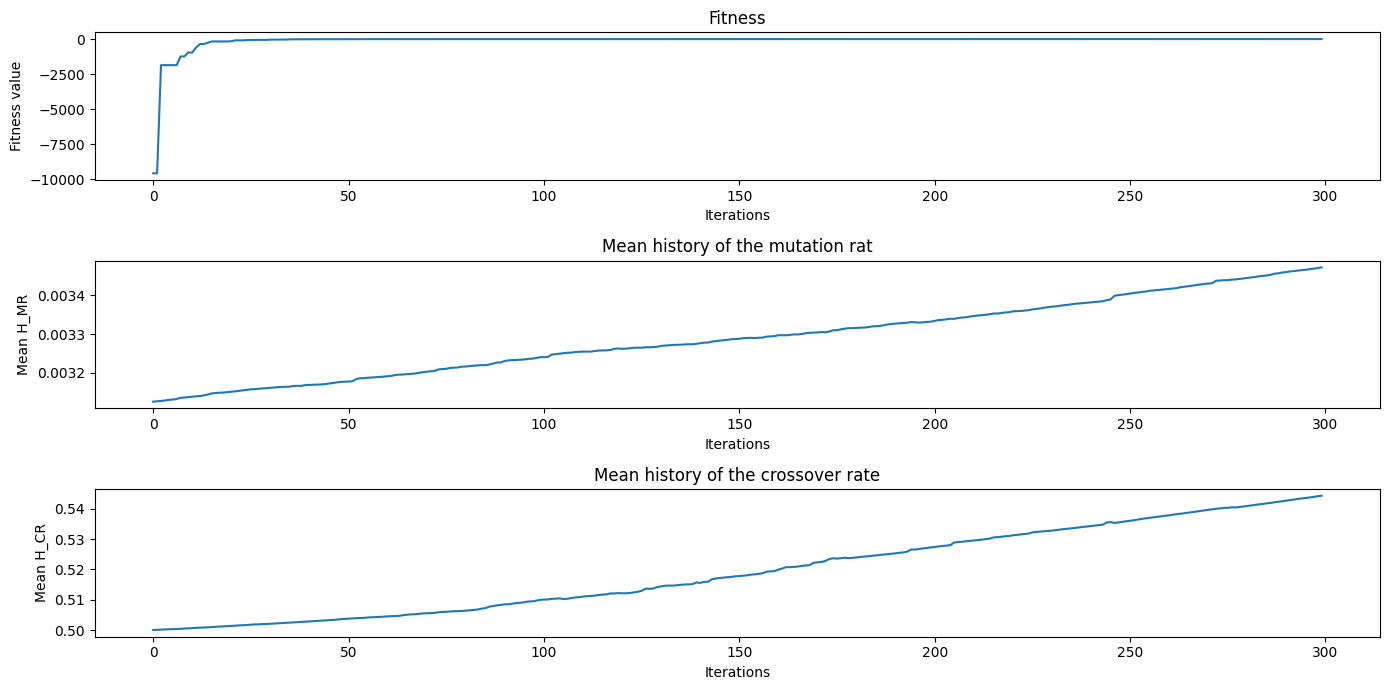

In [5]:
from thefittest.optimizers import SHAGA
from thefittest.benchmarks import Rosenbrock


optimizer = SHAGA(fitness_function=Rosenbrock(),
                  genotype_to_phenotype=genotype_to_phenotype.transform,
                  iters=number_of_iterations,
                  pop_size=population_size,
                  str_len=sum(parts),
                  show_progress_each=30,
                  minimization=True,
                  keep_history=True)

optimizer.fit()

fittest = optimizer.get_fittest()
stats = optimizer.get_stats()

print('The fittest individ:', fittest['genotype'])
print('The fittest individ:', fittest['phenotype'])
print('with fitness', fittest['fitness'])

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=3)

ax[0].plot(range(number_of_iterations), stats['fitness_max'])
ax[0].set_title('Fitness')
ax[0].set_ylabel('Fitness value')
ax[0].set_xlabel("Iterations")

ax[1].plot(range(number_of_iterations), np.array(stats['H_MR']).mean(axis = 1))
ax[1].set_title('Mean history of the mutation rat')
ax[1].set_ylabel('Mean H_MR')
ax[1].set_xlabel("Iterations")

ax[2].plot(range(number_of_iterations), np.array(stats['H_CR']).mean(axis = 1))
ax[2].set_title('Mean history of the crossover rate')
ax[2].set_ylabel('Mean H_CR')
ax[2].set_xlabel("Iterations")

plt.tight_layout()
plt.show()